# Identify the mediod of a flock of particels

When a group of particles, or trajectories, join together is space, they can be considered a *flock*. Such clusters have specific diagnostics and spatial temporal statistics, of which some are shown below. The *mediod* is the trajectory that has the least combined separation distance from all trajectories.

### 0. Import of libraries

General libraries are imported, but also the specific functions which are situated in this folder

In [1]:
import os
import time

import netCDF4 as nc

import cartopy
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from Functions.flock_measures import mediod

print(time.ctime(time.time()))

Thu Jun 15 15:49:59 2023


### 1. Load the data
load the toy data:

In [2]:
fn = 'toy_data_01.nc'
ds = nc.Dataset(os.path.join(os.pardir, 'Simulations', fn))

lat, lon = ds['lat'][:], ds['lon'][:]
tim, id = ds['time'][:], ds['trajectory'][:]

# make a selection so a relatively coherent flock is present
lat, lon, tim = lat[100:,:40], lon[100:,:40], tim[100:,:40]

### 2. Calculate the mediod of a flock

The toy data example consist of parcels that are released at the same time, within an square box. As time progresses these parcels create trajectories. One trajectory which might describe the general trajectory best is the <a href="https://en.wikipedia.org/wiki/Medoid" target="_blank">medoid</a>. In respect to all others, this spatial temporal path has the least separation distance, along the whole timespan. It can be calculated in the following way:

In [3]:
id_mean = mediod(lon.data, lat.data, spherical=True, robust=False)

In the code above, the mean distance is used, but to be less sensative to outliers, the median can be used as well:

In [4]:
id_medi = mediod(lon.data, lat.data, spherical=True, robust=True)

Now these can be plotted:

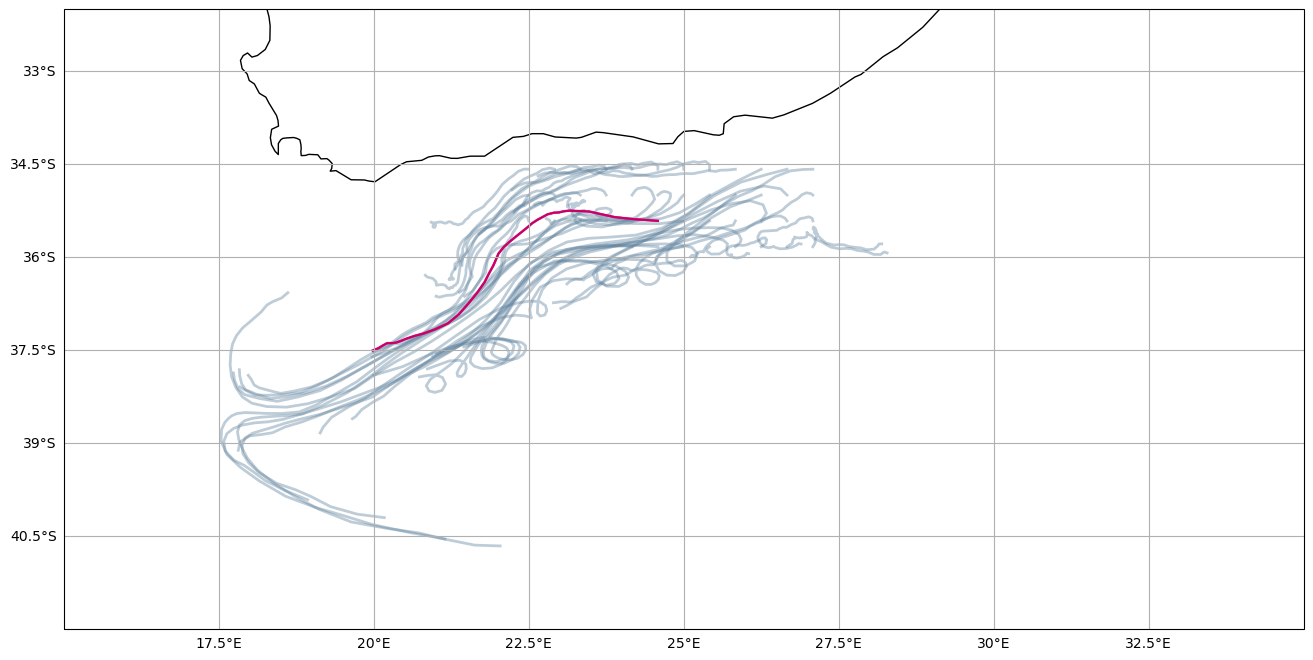

In [5]:
fig = plt.figure(figsize=(16,17)) #(17,5)
ax1 = plt.subplot(111, projection=cartopy.crs.PlateCarree())
    
ax1.coastlines(resolution='50m')
ax1.plot(lon.data.T, lat.data.T, transform=cartopy.crs.PlateCarree(), 
         color='xkcd:greyish blue', alpha=0.4, linewidth=2)
ax1.plot(lon.data[id_mean,...], lat.data[id_mean,...], 
         transform=cartopy.crs.PlateCarree(), color='xkcd:bright pink')
ax1.plot(lon.data[id_medi,...], lat.data[id_medi,...], 
         transform=cartopy.crs.PlateCarree(), color='xkcd:deep pink')
ax1.set_xlim([15, 35])
ax1.set_ylim([-42, -32])
gl = ax1.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()